In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Move to project root
from pathlib import Path
import os

if not Path("./src/models").is_dir():
    for parent_path in Path.cwd().parents:
        if (parent_path / "src/models").is_dir():
            os.chdir(parent_path)
            break
    else:
        raise FileNotFoundError("Can't find project root")

assert Path("./src/models").is_dir()

In [3]:
partial_k_mnist = pl.read_parquet("./.data/long_k_mnist.pq")


# .with_columns(
# pl.col("standard-3").alias("standard-1"),
# pl.col("standard-3").alias("standard-2"),
# pl.col("standard-5").alias("standard-4"),
# pl.col("iso-3-ss").alias("iso-2-ss"),
# pl.col("aniso-3-ss-iso-spin").alias("aniso-2-ss-iso-spin"),
# pl.col("aniso-3-skewed-spin").alias("aniso-2-skewed-spin"),
# )


def _sort_key(s: str):
    name, size, *rest = s.split("-")
    order = {"standard": 0, "iso": 1, "aniso": 2}[name]
    return order, rest, int(size)


partial_k_mnist = partial_k_mnist.select(sorted(partial_k_mnist.columns, key=_sort_key))
partial_k_mnist

standard-3,standard-5,iso-3-ss,iso-5-ss,iso-7-ss,iso-11-ss,aniso-3-skewed-spin,aniso-5-skewed-spin,aniso-7-skewed-spin,aniso-11-skewed-spin,aniso-3-ss-iso-spin,aniso-5-ss-iso-spin,aniso-7-ss-iso-spin,aniso-11-ss-iso-spin
struct[7],struct[7],struct[7],struct[7],struct[7],struct[7],struct[7],struct[7],struct[7],struct[7],struct[7],struct[7],struct[7],struct[7]
"{0.95638,0.934507,0.972595,0.956306,1.905994,0.687438,2.593432}","{0.946723,0.924184,0.966986,0.94667,2.018605,0.338213,2.356819}","{0.960503,0.926542,0.975793,0.960517,4.002031,0.973713,4.975744}","{0.961046,0.924973,0.975322,0.961075,3.379553,0.701855,4.081409}","{0.956163,0.92861,0.97469,0.956174,3.591395,0.566813,4.158208}","{0.955946,0.928726,0.974772,0.956002,4.618734,0.695868,5.314602}","{0.956923,0.930258,0.970874,0.956843,3.357697,0.108321,3.466019}","{0.959093,0.934641,0.982133,0.959041,3.229278,0.108828,3.338106}","{0.954753,0.928532,0.976293,0.954788,3.178779,0.110065,3.288844}","{0.958008,0.92511,0.972737,0.95797,4.244951,0.109267,4.354218}","{0.960286,0.942029,0.971246,0.960185,3.891996,0.722275,4.614271}","{0.95855,0.93117,0.974836,0.958487,3.759535,0.545664,4.305199}","{0.958659,0.930157,0.969962,0.958605,3.563311,0.547856,4.111167}","{0.958659,0.924987,0.976668,0.958681,4.845415,0.543459,5.388874}"
"{0.956814,0.92779,0.971932,0.956786,1.793958,0.00102,1.794978}","{0.953559,0.936947,0.968917,0.953509,2.006244,0.000996,2.00724}","{0.957574,0.936639,0.974441,0.957538,3.255609,0.001351,3.256961}","{0.96224,0.937535,0.972043,0.962226,2.963692,0.001363,2.965055}","{0.963867,0.941957,0.974973,0.963832,3.084474,0.001562,3.086036}","{0.965278,0.94,0.976009,0.965221,4.147022,0.001345,4.148367}","{0.958333,0.925271,0.974753,0.958154,3.425553,0.001702,3.427255}","{0.963325,0.936053,0.981681,0.963273,3.241149,0.001744,3.242893}","{0.964844,0.943274,0.977802,0.964876,3.25092,0.001712,3.252632}","{0.964627,0.946726,0.980075,0.964569,4.26467,0.001772,4.266442}","{0.959201,0.93522,0.973089,0.959205,3.299744,0.001734,3.301479}","{0.957465,0.916402,0.977124,0.957536,3.358612,0.001741,3.360353}","{0.966688,0.943646,0.979482,0.966612,3.273816,0.001881,3.275697}","{0.966146,0.942021,0.976744,0.966093,4.321712,0.001758,4.32347}"
"{0.956055,0.929901,0.972447,0.95604,1.799661,0.000933,1.800595}","{0.951714,0.928298,0.966986,0.951617,2.008707,0.000962,2.009669}","{0.961697,0.935094,0.974026,0.96162,3.020164,0.001342,3.021506}","{0.960286,0.938383,0.969437,0.960164,2.987419,0.00129,2.988709}","{0.963976,0.933702,0.974194,0.963888,3.084744,0.001274,3.086018}","{0.95931,0.927313,0.971703,0.959215,4.167367,0.001337,4.168704}","{0.957574,0.924444,0.974636,0.957485,3.55935,0.001642,3.560992}","{0.947808,0.920746,0.9632,0.947649,3.250356,0.001695,3.252051}","{0.962457,0.920803,0.973499,0.962566,3.303089,0.00174,3.304828}","{0.964301,0.935897,0.978885,0.964322,4.258052,0.001727,4.259779}","{0.95714,0.929392,0.970635,0.957032,3.420968,0.001698,3.422666}","{0.95931,0.92459,0.973233,0.959302,3.369487,0.001776,3.371263}","{0.96072,0.935537,0.979681,0.960749,3.279969,0.001687,3.281657}","{0.962782,0.932447,0.976395,0.962675,4.355287,0.001732,4.357019}"
"{0.956597,0.931151,0.96648,0.95649,1.792575,0.000915,1.79349}","{0.840603,0.803822,0.872074,0.840788,2.004934,0.000964,2.005897}","{0.953559,0.912602,0.976668,0.953678,3.118349,0.001281,3.119629}","{0.964627,0.943956,0.978541,0.964572,2.909157,0.001294,2.910451}","{0.959852,0.928696,0.975504,0.959608,3.111108,0.001272,3.11238}","{0.959744,0.946838,0.974138,0.959689,4.194583,0.001313,4.195895}","{0.960612,0.937908,0.975162,0.960629,3.571843,0.001652,3.573495}","{0.957248,0.915361,0.976769,0.957408,3.242665,0.001669,3.244334}","{0.963976,0.937908,0.977992,0.963908,3.198274,0.001662,3.199936}","{0.960612,0.931314,0.977322,0.960586,4.266107,0.001736,4.267843}","{0.953885,0.928733,0.975135,0.953797,3.519857,0.001649,3.521506}","{0.958442,0.946556,0.97553,0.958386,3.303855,0.001694,3.305549}","{0.966363,0.939545,0.980054,0.966298,3.24681,0.001693,3.2

In [4]:
def preprocess_data(
    data: pl.DataFrame, metric: str = "acc", low: float = 0.05, high: float = 0.95
):
    return (
        data.select(
            pl.all()
            .implode()
            .list.eval(
                pl.struct(
                    mean=pl.element().struct.field(metric).mean(),
                    high=pl.element().struct.field(metric).quantile(high),
                    low=pl.element().struct.field(metric).quantile(low),
                )
            )
            .list.get(0)
        )
        .transpose(include_header=True, column_names=["metric"], header_name="kind")
        .lazy()
        .unnest("metric")
        .with_columns(
            pl.col("kind").str.split_exact("-", 2),
            grouped=pl.col("kind").str.contains("grouped"),
            closing=pl.col("kind").str.contains("closing"),
        )
        .select(
            pl.col("kind")
            .struct[0]
            .add(
                pl.when(pl.col("kind").struct[2].is_not_null())
                .then(pl.lit("-").add(pl.col("kind").struct[2]))
                .otherwise(pl.lit(""))
            )
            .alias("kind"),
            pl.col("kind").struct[1].cast(int).alias("size"),
            "grouped",
            "closing",
            "low",
            "mean",
            "high",
        )
        .collect()
    )


km_pre_part = preprocess_data(partial_k_mnist, metric="acc")
km_pre_part

kind,size,grouped,closing,low,mean,high
str,i64,bool,bool,f64,f64,f64
"""standard""",3,false,false,0.949327,0.955834,0.963108
"""standard""",5,false,false,0.926541,0.944839,0.958008
"""iso-ss""",3,false,false,0.952148,0.957488,0.963325
"""iso-ss""",5,false,false,0.95421,0.959805,0.965712
"""iso-ss""",7,false,false,0.953234,0.960264,0.965929
…,…,…,…,…,…,…
"""aniso-skewed""",11,false,false,0.953125,0.961454,0.967665
"""aniso-ss""",3,false,false,0.951714,0.958236,0.963867
"""aniso-ss""",5,false,false,0.953016,0.959644,0.965061


In [5]:
missing_zeroes = pl.DataFrame(
    {
        "kind": [
            "standard",
            "standard",
            "standard",
            "iso-ss",
            "aniso-ss",
            "aniso-skewed",
        ],
        "size": [1, 2, 4, 2, 2, 2],
        "grouped": [False] * 6,
        "closing": [False] * 6,
        "low": [0.0] * 6,
        "mean": [0.0] * 6,
        "high": [0.0] * 6,
    }
)
missing_zeroes

kind,size,grouped,closing,low,mean,high
str,i64,bool,bool,f64,f64,f64
"""standard""",1,false,false,0.0,0.0,0.0
"""standard""",2,false,false,0.0,0.0,0.0
"""standard""",4,false,false,0.0,0.0,0.0
"""iso-ss""",2,false,false,0.0,0.0,0.0
"""aniso-ss""",2,false,false,0.0,0.0,0.0
"""aniso-skewed""",2,false,false,0.0,0.0,0.0


In [10]:
km_pre = km_pre_part.vstack(missing_zeroes).sort(
    "kind", pl.col("size").neg(), descending=True
)
km_pre

kind,size,grouped,closing,low,mean,high
str,i64,bool,bool,f64,f64,f64
"""standard""",1,false,false,0.0,0.0,0.0
"""standard""",2,false,false,0.0,0.0,0.0
"""standard""",3,false,false,0.949327,0.955834,0.963108
"""standard""",4,false,false,0.0,0.0,0.0
"""standard""",5,false,false,0.926541,0.944839,0.958008
…,…,…,…,…,…,…
"""aniso-skewed""",2,false,false,0.0,0.0,0.0
"""aniso-skewed""",3,false,false,0.950087,0.958651,0.964735
"""aniso-skewed""",5,false,false,0.953016,0.960623,0.967122


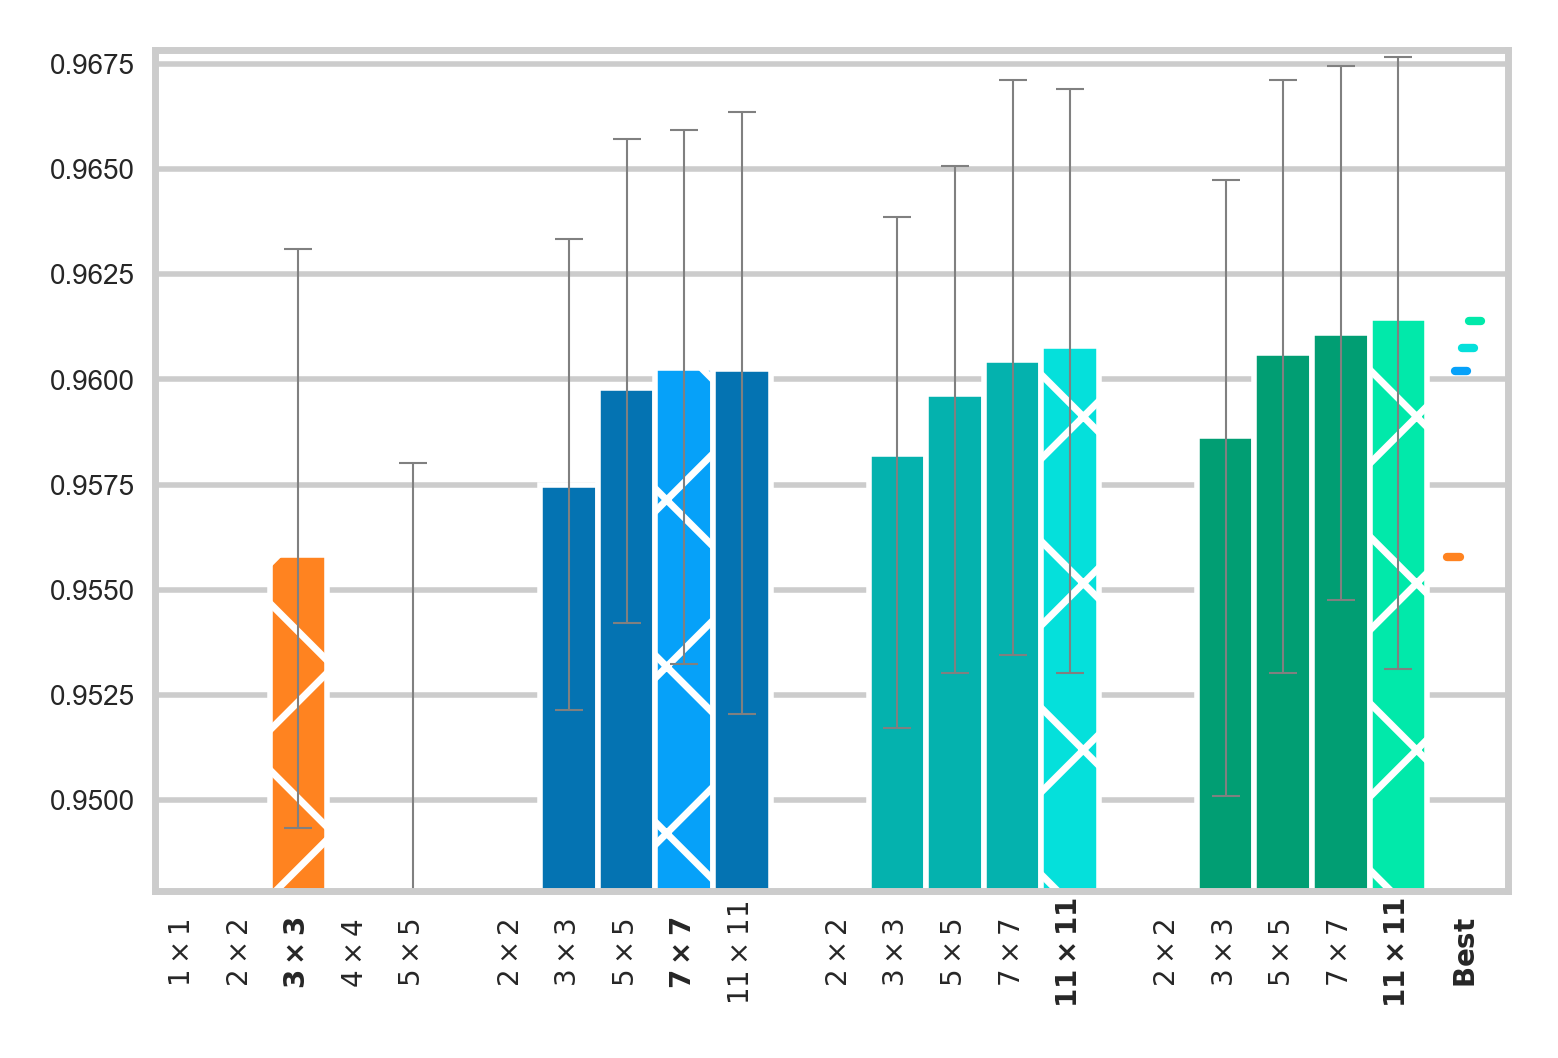

In [58]:
def plot_group_kernel_size(
    ax: plt.Axes,
    tick_positions: list[float],
    tick_labels: list[str],
    group: pl.DataFrame,
    color: str,
    begin: float,
    width: float,
    highlight: str = None,
    higher_is_better: bool = True,
):
    best = (
        group.with_row_index()
        .filter(pl.col("mean").ne(0))
        .top_k(1, by="mean", reverse=not higher_is_better)
        .item(0, column="index")
    )
    x = begin
    for i, (_kind, size, _grp, _cls, low, mean, high) in enumerate(group.iter_rows()):
        ax.bar(
            x,
            mean,
            width,
            align="edge",
            color=highlight if highlight and i == best else color,
            hatch="x" if highlight and i == best else "",
        )
        ax.errorbar(
            x + width / 2,
            min(max(mean, low), high),
            ((mean - low if mean > low else 0,), (high - mean if high > mean else 0,)),
            color="grey",
            capsize=2,
            linewidth=0.3,
            capthick=0.3,
        )
        tick_positions.append(x + width / 2)
        if i == best:
            label = rf"$\mathbf{{{size}\times{size}}}$"
        else:
            label = rf"${size}\times{size}$"
        tick_labels.append(label)
        x += width


def plot_results(
    group_plotter,
    data: pl.DataFrame,
    baseline: tuple[str, int] = ("standard", 1),
    baseline_height: float = 0.4,
    total_height: float = 2 / 100,
    figsize: tuple[float, float] = (3, 2),
    group_gap: float = 0.03,
    higher_is_better: bool = True,
    save_path: str = None,
    x_tick_pad=4.0,
    ylim: tuple[int, int] = None,
):
    sns.set_theme("paper", "whitegrid")
    fig, ax = plt.subplots(layout="compressed", figsize=figsize, dpi=500)
    if ylim is None:
        bot = (
            data.filter(
                pl.col("kind").eq(baseline[0]) & pl.col("size").eq(baseline[1])
            ).item(0, "mean")
        ) - (baseline_height * total_height)
        ax.set_ylim(bot, bot + total_height)
    else:
        ax.set_ylim(ylim[0], ylim[1])
    ax.set_xlim(0, 1)
    n_groups = data.n_unique("kind")
    total_bar_space = 1.0 - group_gap * (n_groups + 1)
    per_bar_space = total_bar_space / len(data)
    best_stripes_start = 1.0 - group_gap * 1.5
    best_stripes_len = group_gap * 0.3
    best_stripes_step = group_gap * 0.7 / n_groups
    colors = {
        "standard": ("#D55E00", "#FF8320"),
        "iso-ss": ("#0473B2", "#06A1F9"),
        "aniso-ss": ("#04B2AE", "#05E0DB"),
        "aniso-skewed": ("#019E73", "#01E9AA"),
    }

    x = 0
    tick_positions, tick_labels = [], []
    for grp_i, (name, (color, highlight)) in enumerate(colors.items()):
        group = data.filter(pl.col("kind").eq(name))
        if len(group) == 0:
            continue

        group_plotter(
            ax,
            tick_positions,
            tick_labels,
            group,
            color=color,
            begin=x,
            width=per_bar_space,
            highlight=highlight,
            higher_is_better=higher_is_better,
        )
        high = (
            group.filter(pl.col("mean").ne(0))
            .top_k(1, by="mean", reverse=not higher_is_better)
            .item(0, column="mean")
        )
        stripe_start = best_stripes_start + best_stripes_step * grp_i
        ax.plot(
            (stripe_start, stripe_start + best_stripes_len),
            # Matplotlib draws the lines *slightly* off-centre...
            (high - 0.00006, high - 0.00006),
            color=highlight,
            # linestyle="dashed",
        )
        x += group_gap + per_bar_space * len(group)

    tick_positions.append(best_stripes_start + group_gap / 2)
    tick_labels.append(r"$\mathbf{Best}$")
    ax.set_xticks(tick_positions, tick_labels, rotation=90, va="center")
    ax.tick_params(labelsize=4)
    for tick in ax.get_xaxis().get_major_ticks():
        tick.set_pad(x_tick_pad)
    for tick in ax.get_yaxis().get_major_ticks():
        tick.set_pad(-2.0)
    ax.grid(False, axis="x")

    if save_path is not None:
        fig.savefig(save_path)


plot_results(
    plot_group_kernel_size,
    km_pre,
    save_path="./report/figures/results_k_mnist.png",
    baseline=("standard", 3),
)
plt.show()

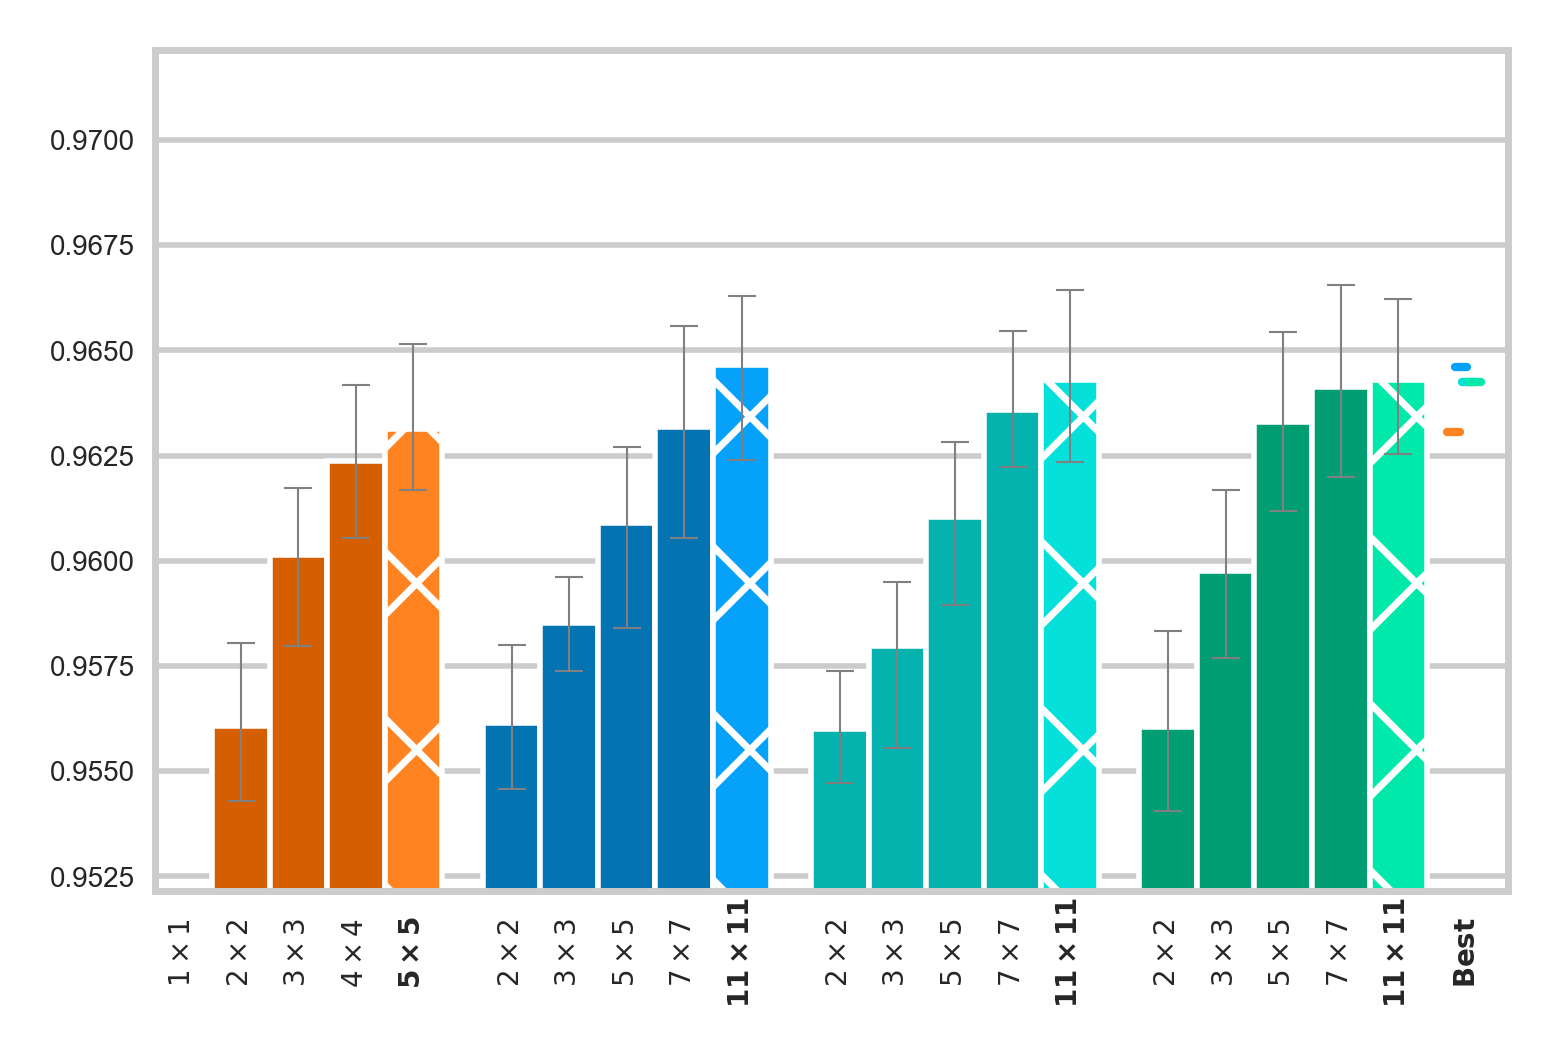

In [42]:
plot_results(
    plot_group_kernel_size,
    preprocess_data(pl.read_parquet("./.data/long_svhn.pq")),
    save_path="./report/figures/results_svhn.png",
    baseline=("standard", 3),
)
plt.show()

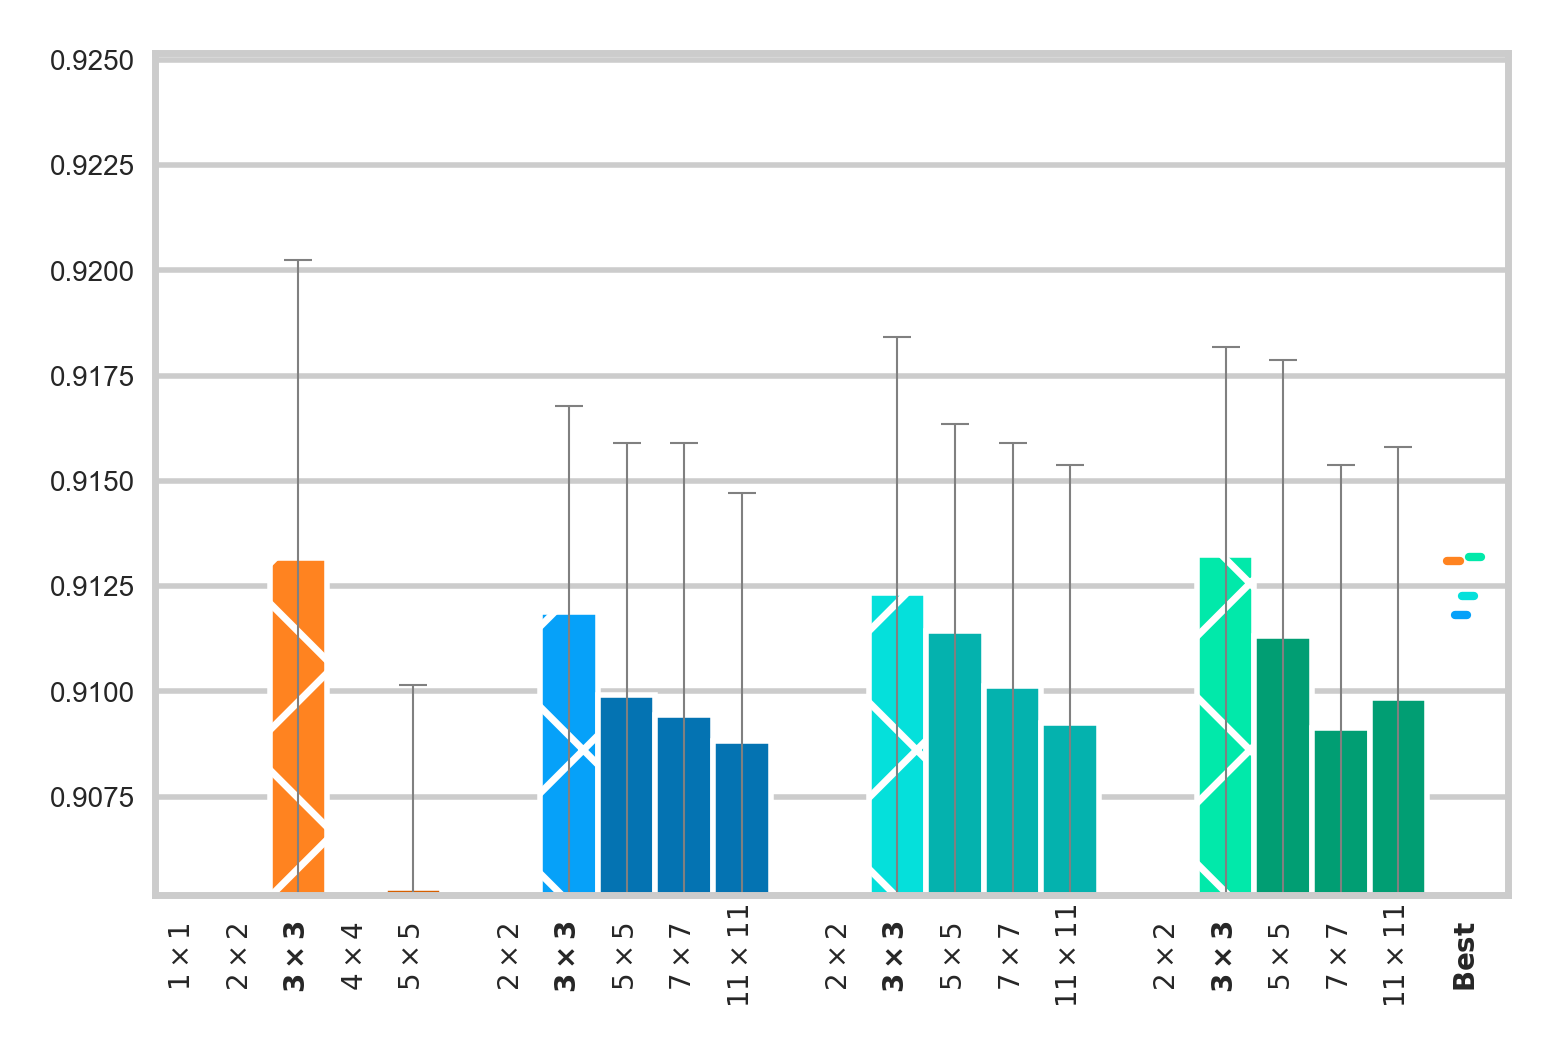

In [43]:
partial_fashion = pl.read_parquet("./.data/long_fashion.pq")
fs_pre_part = preprocess_data(partial_fashion)
fs_pre = fs_pre_part.vstack(missing_zeroes).sort(
    "kind", pl.col("size").neg(), descending=True
)
plot_results(
    plot_group_kernel_size,
    fs_pre,
    save_path="./report/figures/results_fashion.png",
    baseline=("standard", 3),
)
plt.show()

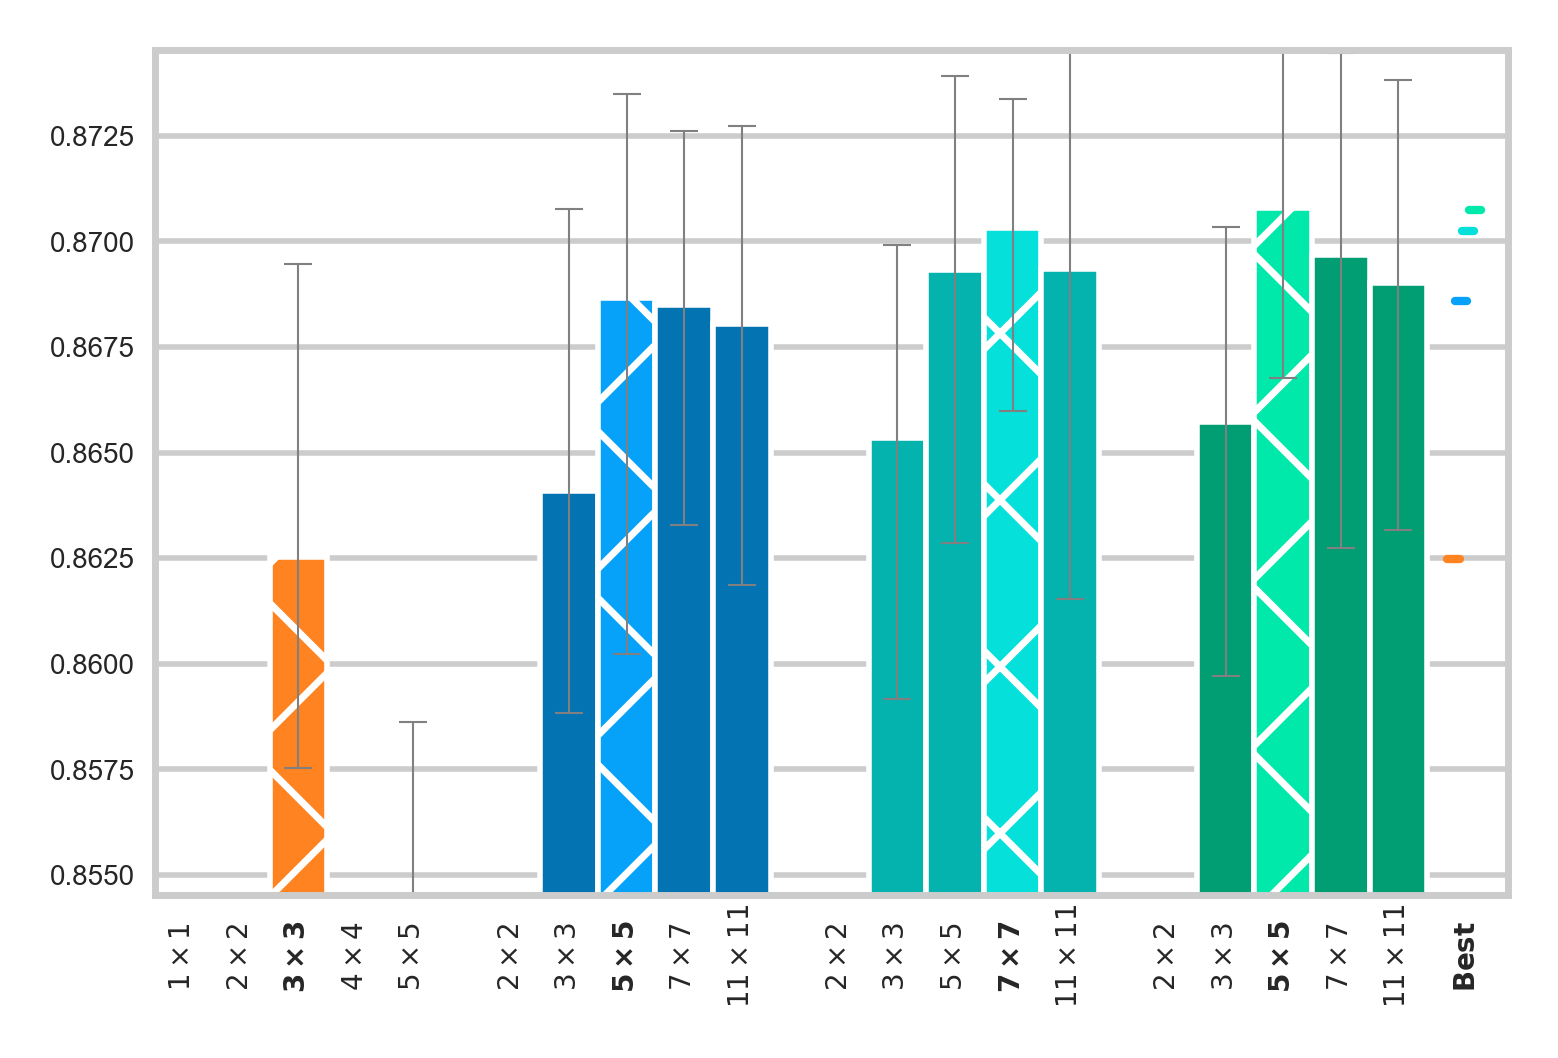

In [51]:
partial_cifar10 = pl.read_parquet("./.data/long_cifar10.pq")
cf_pre_part = preprocess_data(partial_cifar10)
cf_pre = cf_pre_part.vstack(missing_zeroes).sort(
    "kind", pl.col("size").neg(), descending=True
)
plot_results(
    plot_group_kernel_size,
    cf_pre,
    save_path="./report/figures/results_cifar10.png",
    baseline=("standard", 3),
)
plt.show()

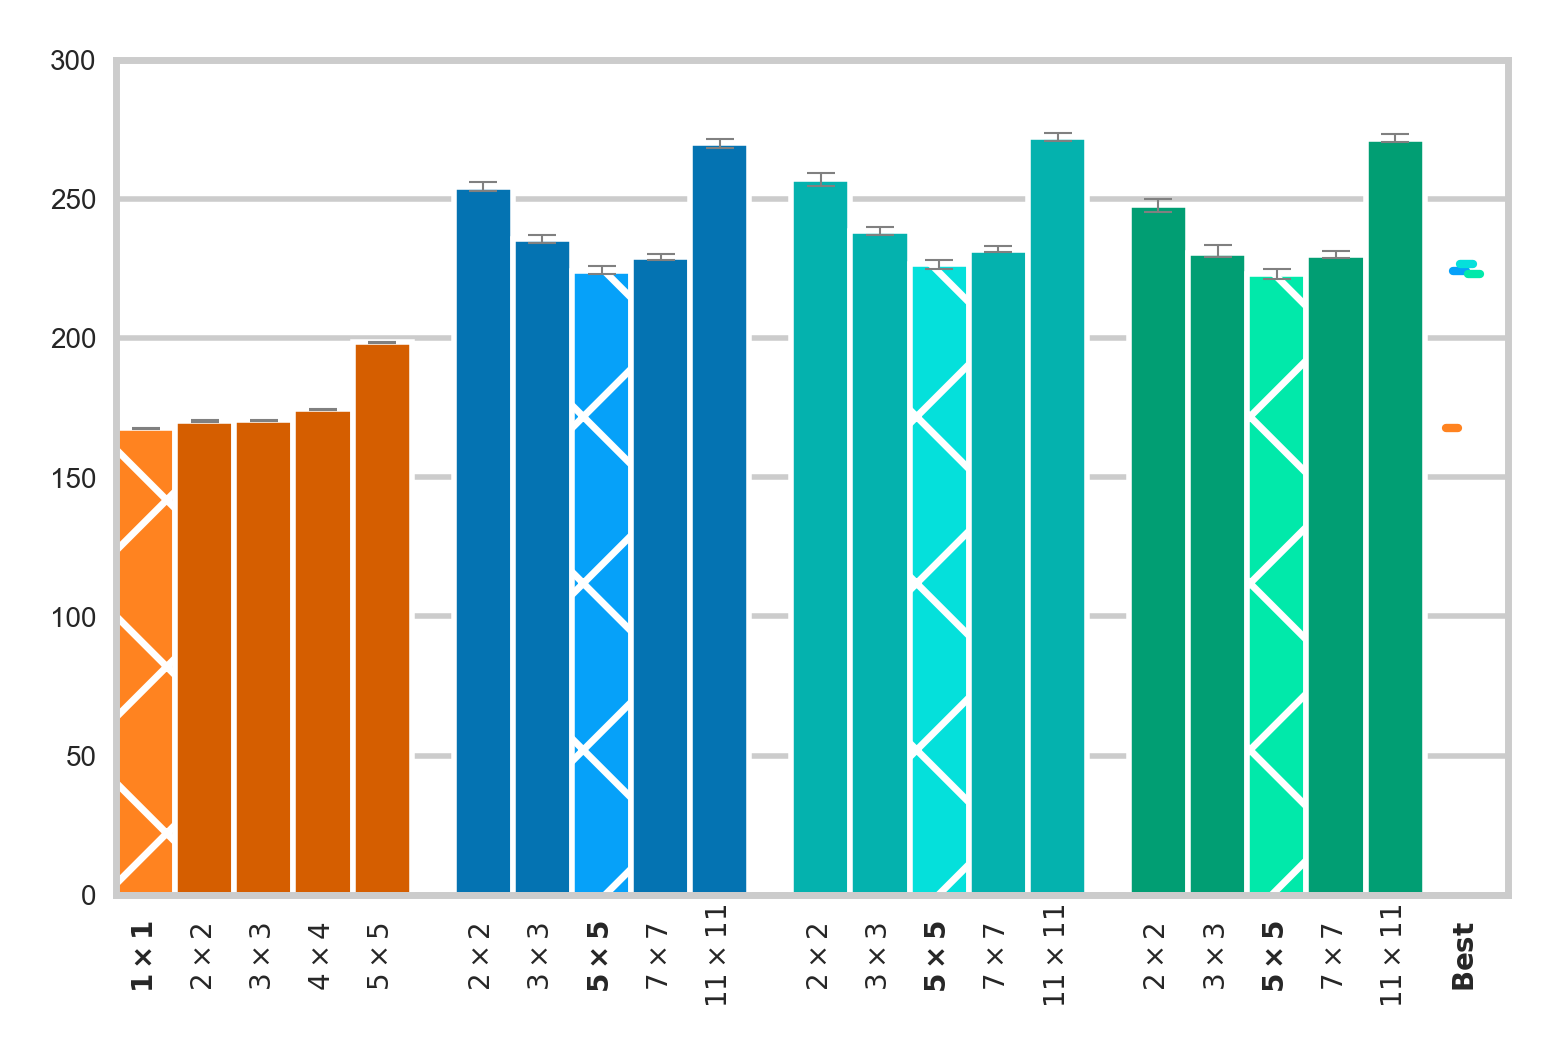

In [50]:
plot_results(
    plot_group_kernel_size,
    preprocess_data(pl.read_parquet("./.data/long_svhn.pq"), metric="train_times"),
    save_path="./report/figures/timings_svhn.png",
    higher_is_better=False,
    ylim=(0, 300),
)
plt.show()

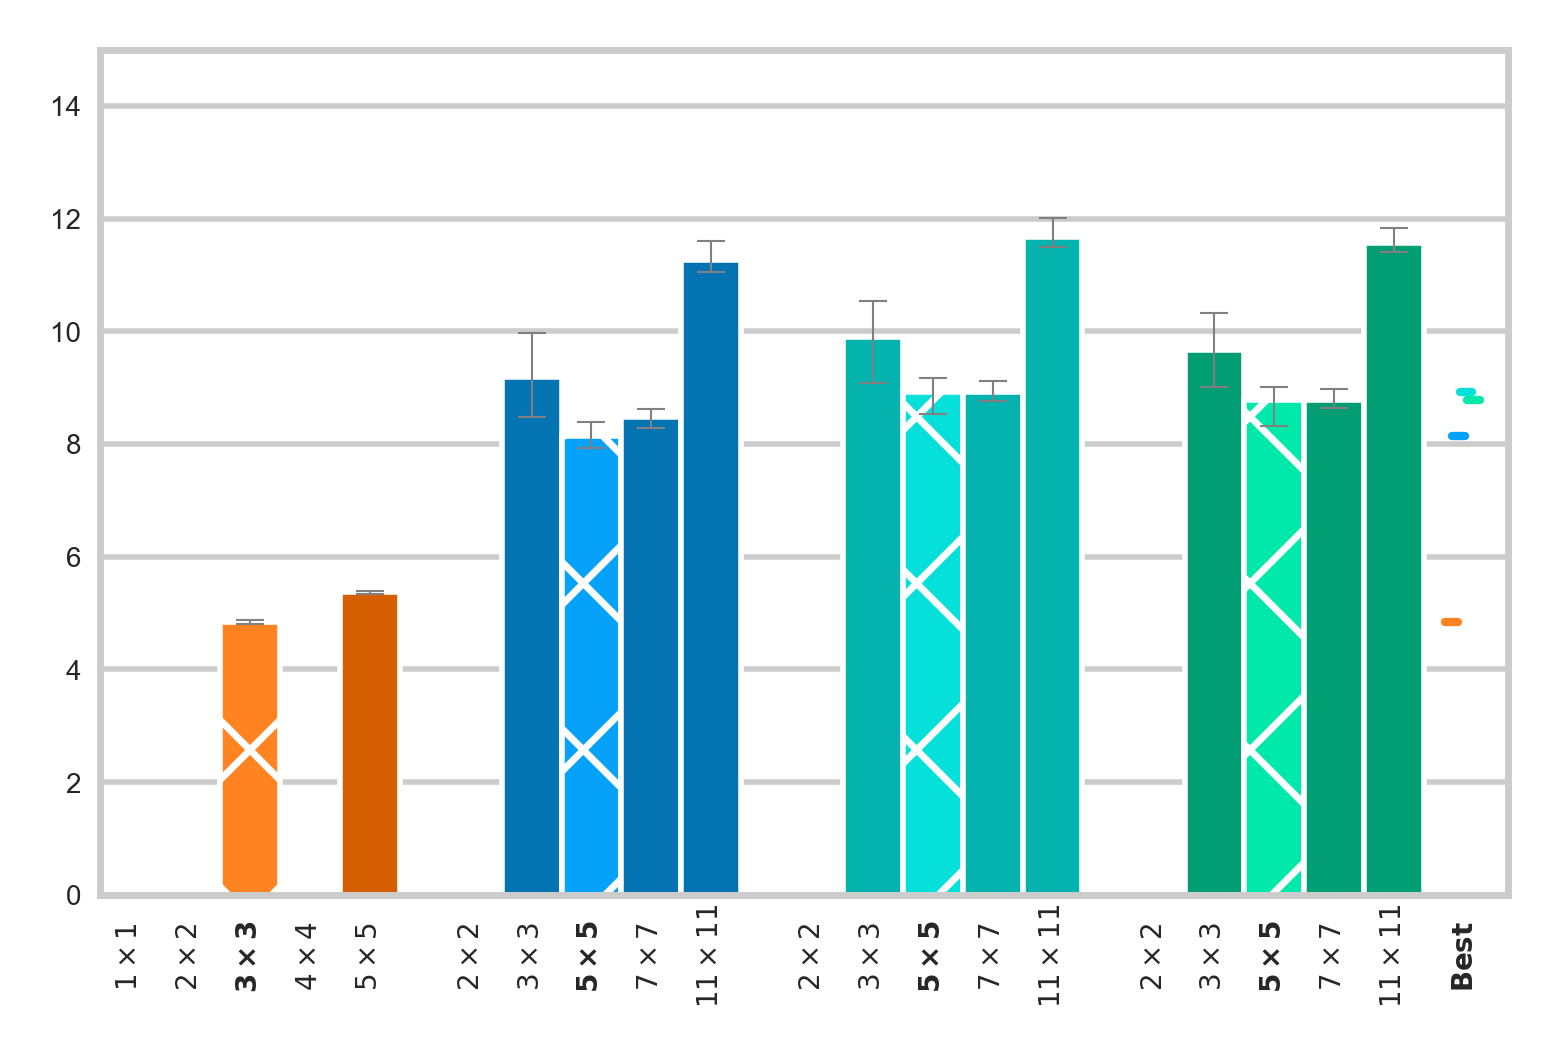

In [59]:
partial_fashion = pl.read_parquet("./.data/long_fashion.pq")
fs_pre_part = preprocess_data(partial_fashion, metric="train_times")
fs_pre = fs_pre_part.vstack(missing_zeroes).sort(
    "kind", pl.col("size").neg(), descending=True
)
plot_results(
    plot_group_kernel_size,
    fs_pre,
    save_path="./report/figures/timings_fashion.png",
    higher_is_better=False,
    ylim=(0, 15),
)
plt.show()

In [ ]:
plot_results(
    plot_group_kernel_size,
    preprocess_data(fake_data, metric="train_times"),
    higher_is_better=False,
)
plt.title("Train run durations")
plt.ylim(0, 5)

In [47]:
fake_data_alt = pl.read_parquet("./.data/groups_k_mnist.pq").select(
    pl.col("iso-7-ss-gsize1").alias("iso-7-ss"),
    pl.col("iso-7-ss-gsize1-channeladd").alias("iso-7-ss-closing"),
    pl.col("iso-7-ss-gsize2").alias("iso-7-ss-grouped"),
    pl.col("iso-7-ss-gsize2-channeladd").alias("iso-7-ss-closing-grouped"),
    pl.col("aniso-7-ss-iso-spin-gsize1").alias("aniso-7-ss-iso-spin"),
    pl.col("aniso-7-ss-iso-spin-gsize1-channeladd").alias(
        "aniso-7-ss-iso-spin-closing"
    ),
    pl.col("aniso-7-ss-iso-spin-gsize2").alias("aniso-7-ss-iso-spin-grouped"),
    pl.col("aniso-7-ss-iso-spin-gsize2-channeladd").alias(
        "aniso-7-ss-iso-spin-closing-grouped"
    ),
    pl.col("aniso-7-skewed-spin-gsize1").alias("aniso-7-skewed-spin"),
    pl.col("aniso-7-skewed-spin-gsize1-channeladd").alias(
        "aniso-7-skewed-spin-closing"
    ),
    pl.col("aniso-7-skewed-spin-gsize2").alias("aniso-7-skewed-spin-grouped"),
    pl.col("aniso-7-skewed-spin-gsize2-channeladd").alias(
        "aniso-7-skewed-spin-closing-grouped"
    ),
)
fake_pre_alt = preprocess_data(fake_data_alt, metric="acc")
fake_pre_alt

kind,size,grouped,closing,low,mean,high
str,i64,bool,bool,f64,f64,f64
"""iso-ss""",7,false,false,0.954536,0.961025,0.96658
"""iso-ss""",7,false,true,0.953668,0.961058,0.967339
"""iso-ss""",7,true,false,0.938043,0.949932,0.959527
"""iso-ss""",7,true,true,0.914822,0.942027,0.955404
"""aniso-ss""",7,false,false,0.954536,0.961257,0.967556
…,…,…,…,…,…,…
"""aniso-ss""",7,true,true,0.924262,0.936484,0.958333
"""aniso-skewed""",7,false,false,0.953993,0.961788,0.96799
"""aniso-skewed""",7,false,true,0.954753,0.962018,0.967882


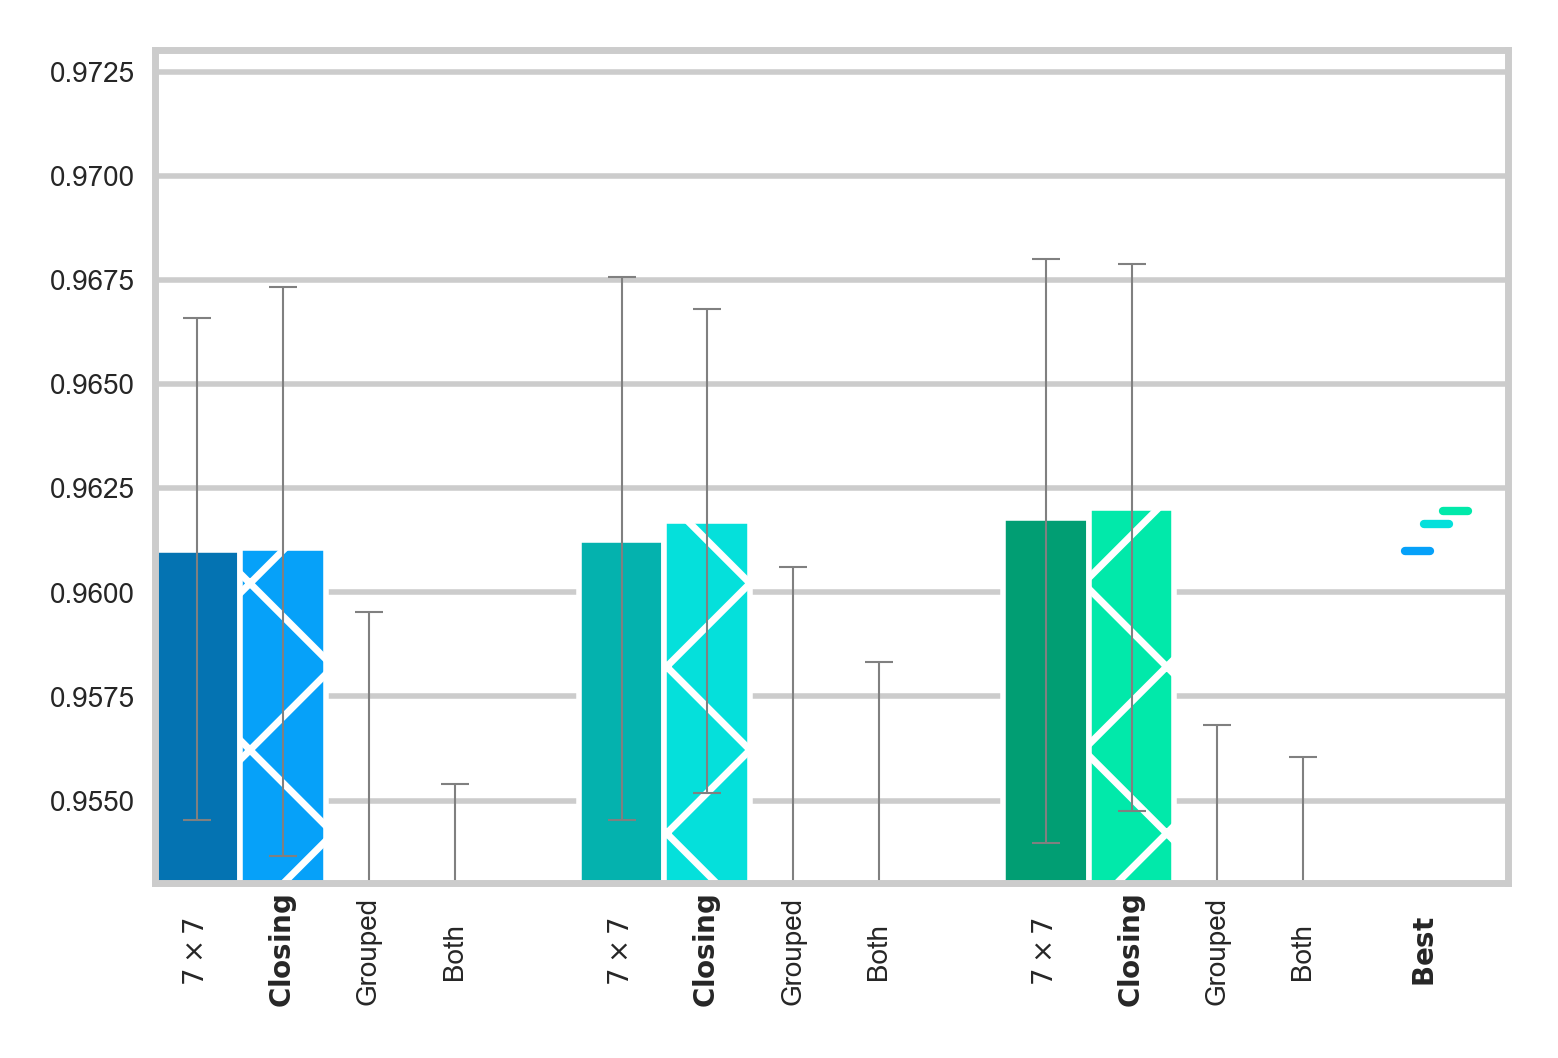

In [48]:
def plot_group_extra(
    ax: plt.Axes,
    tick_positions: list[float],
    tick_labels: list[str],
    group: pl.DataFrame,
    color: str,
    begin: float,
    width: float,
    highlight: str = None,
    higher_is_better: bool = True,
):
    best = (
        group.with_row_index()
        .top_k(1, by="mean", reverse=not higher_is_better)
        .item(0, column="index")
    )
    x = begin
    for i, (_kind, size, grouped, closing, low, mean, high) in enumerate(
        group.iter_rows()
    ):
        ax.bar(
            x,
            mean,
            width,
            align="edge",
            color=highlight if highlight and i == best else color,
            hatch="x" if highlight and i == best else "",
        )
        ax.errorbar(
            x + width / 2,
            mean,
            ((mean - low,), (high - mean,)),
            color="grey",
            capsize=2,
            linewidth=0.3,
            capthick=0.3,
        )
        tick_positions.append(x + width / 2)
        text = {
            (False, False): rf"{size}\times{size}",
            (False, True): r"Closing",
            (True, False): r"Grouped",
            (True, True): r"Both",
        }[(grouped, closing)]
        if i == best:
            label = rf"$\mathbf{{{text}}}$"
        else:
            label = rf"${text}$" if "\\" in text else text
        tick_labels.append(label)
        x += width


plot_results(
    plot_group_extra,
    fake_pre_alt,
    baseline=("iso-ss", 7),
    group_gap=0.06,
    x_tick_pad=5.0,
    save_path="./report/figures/results_fake_alt.png",
)
plt.show()